In [ ]:
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Loading the Xsum dataset from Hugging Face
from datasets import load_dataset

dataset = load_dataset("xsum")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

xsum.py:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

The repository for xsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/xsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


(…)SUM-EMNLP18-Summary-Data-Original.tar.gz:   0%|          | 0.00/255M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd

#Spliting the dataset
train_data = dataset['train']
test_data = dataset['test']
val_data = dataset['validation']

#Converting the Hugging Face Dataset into a pandas Dataframe for cleaning
full_train_df = pd.DataFrame(train_data)
full_test_df = pd.DataFrame(test_data)
full_val_df = pd.DataFrame(val_data)

In [ ]:
from bs4 import BeautifulSoup
import html
def clean_xsum_text(text):
    # Suppression des balises HTML
    text = BeautifulSoup(text, "html.parser").get_text()
    # Décodage des entités HTML
    text = html.unescape(text)
    # Suppression des caractères spéciaux
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    # Réduction des espaces multiples
    text = ' '.join(text.split())
    # Suppression des mentions non informatives (exemple)
    for pattern in ["BBC News", "Read more", "Copyright"]:
        text = text.replace(pattern, "")
    return text.strip()

In [ ]:
full_train_df['document'] = full_train_df['document'].apply(clean_xsum_text)
full_val_df['document'] = full_val_df['document'].apply(clean_xsum_text)
full_test_df['document'] = full_test_df['document'].apply(clean_xsum_text)

In [ ]:
display(full_train_df.head(5))

,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984


In [10]:
train_df = full_train_df.sample(frac=0.33, random_state=0)

In [11]:
from datasets import Dataset

train_data = Dataset.from_pandas(train_df)
val_data = Dataset.from_pandas(full_val_df)
test_data = Dataset.from_pandas(full_test_df)

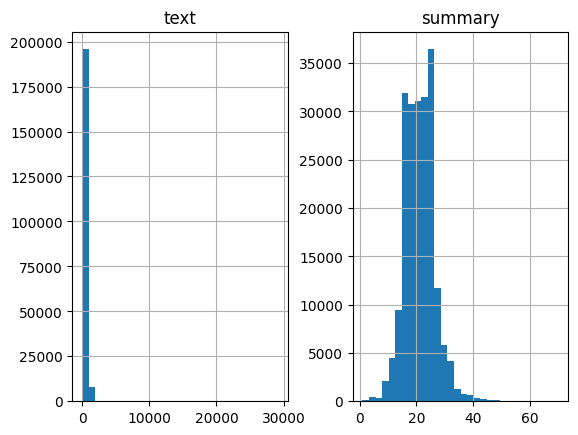

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in full_train_df['document']:
      text_word_count.append(len(i.split()))

for j in full_train_df['summary']:
      summary_word_count.append(len(j.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [13]:
#Hyperparameters
CONFIG={
  'name': "t5_fine_tuned",
  'max_doc_length': 512,
  'max_sum_length': 64
}

In [14]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
import torch

tokenizer = AutoTokenizer.from_pretrained("t5-small")

def preprocess_function(examples):
    inputs = ["summarize: " + doc for doc in examples["document"]]
    model_inputs = tokenizer(inputs, max_length=CONFIG['max_doc_length'], truncation=True, padding="max_length")

    labels = tokenizer(examples["summary"], max_length=CONFIG['max_sum_length'], truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]

    return model_inputs

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [15]:
train_tokenized = train_data.map(preprocess_function, batched=True, remove_columns=train_data.column_names)
val_tokenized = val_data.map(preprocess_function, batched=True, remove_columns=val_data.column_names)
test_tokenized = test_data.map(preprocess_function, batched=True, remove_columns=test_data.column_names)

Map:   0%|          | 0/67335 [00:00<?, ? examples/s]

Map:   0%|          | 0/11332 [00:00<?, ? examples/s]

Map:   0%|          | 0/11334 [00:00<?, ? examples/s]

In [16]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [17]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./t5_xsum_finetuned",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-5,
    weight_decay=0.01,
    num_train_epochs=3,
    save_total_limit=2,
    predict_with_generate=True,
    logging_dir="./logs",
    logging_steps=200,
    report_to="none",
    fp16=True,
    save_steps=1000,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=val_tokenized,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

<ipython-input-17-2e157035e076>:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [18]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [19]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
200,2.964600
400,1.430900
600,1.392100
800,1.372600
1000,1.371200
1200,1.350300
1400,1.359600
1600,1.351300
1800,1.336300
2000,1.353500


TrainOutput(global_step=12627, training_loss=1.3315862469995277, metrics={'train_runtime': 4348.8752, 'train_samples_per_second': 46.45, 'train_steps_per_second': 2.904, 'total_flos': 2.733972060635136e+16, 'train_loss': 1.3315862469995277, 'epoch': 3.0})

In [20]:
from google.colab import drive
drive.mount('/content/drive')

output_dir = '/content/drive/MyDrive/t5_xsum_finetuned'

trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)

Mounted at /content/drive


('/content/drive/MyDrive/t5_xsum_finetuned/tokenizer_config.json',
 '/content/drive/MyDrive/t5_xsum_finetuned/special_tokens_map.json',
 '/content/drive/MyDrive/t5_xsum_finetuned/spiece.model',
 '/content/drive/MyDrive/t5_xsum_finetuned/added_tokens.json',
 '/content/drive/MyDrive/t5_xsum_finetuned/tokenizer.json')

In [24]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.6 MB/s eta 0:00:00


In [26]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=cb8b9697d09509efb7b185bf2233925747dfc503c4b6a42585d1b47a60bd4a5a
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [27]:
from evaluate import load

rouge = load('rouge')
def compute_rouge_on_test(model, tokenizer, test_tokenized):
    # Effectuer la prédiction sur le test
    predictions = trainer.predict(test_tokenized)
    predicted_texts = tokenizer.batch_decode(predictions.predictions, skip_special_tokens=True)
    true_texts = tokenizer.batch_decode(predictions.label_ids, skip_special_tokens=True)

    # Calculer le score ROUGE
    result = rouge.compute(predictions=predicted_texts, references=true_texts)
    return result

In [28]:
rouge_results = compute_rouge_on_test(model, tokenizer, test_tokenized)
print(rouge_results)

{'rouge1': np.float64(0.2775497390252512), 'rouge2': np.float64(0.07618486101947677), 'rougeL': np.float64(0.2191375279409336), 'rougeLsum': np.float64(0.21906998616318696)}


In [29]:
rouge_results

{'rouge1': np.float64(0.2775497390252512),
 'rouge2': np.float64(0.07618486101947677),
 'rougeL': np.float64(0.2191375279409336),
 'rougeLsum': np.float64(0.21906998616318696)}